# Projekt 1 EDA

## Pakiety

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

## Wczytanie zbioru

In [2]:
census_df = pd.read_csv('census_income_dataset.csv')
census_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48838,64,?,321403.0,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48839,38,Private,374983.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
48840,44,Private,83891.0,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


Wyświetlenie tej ramki danych może pozwolić wstępne zapoznanie się z danymi, których analizy będziemy dokonywać. Można już postawić pierwsze założenia odnośnie typów kolumn oraz ich zawartości. Jednak, aby uzyskać więcej informacji przyjrzyjmy się plikowi, który opisuje zawarte w ramce danych cechy.

## Opis zbioru

In [3]:
attributes_df = pd.read_csv('attributes_census_income.csv')

with pd.option_context('display.max_colwidth', 400):
    display(attributes_df)

,name,type,description
0,age,integer,age of individual
1,workclass,string,"Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked"
2,fnlwgt,float,Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups
3,education,string,"Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool"
4,education_num,integer,NaN
5,marital_status,string,"Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse"
6,occupation,string,"Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces"
7,relationship,string,"Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried"
8,race,string,"Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black"
9,sex,string,"Values: Female, Male"


Dostajemy w ten sposób informacje o typach kolumn, a także o ich zawartości (przykładowo dla zmiennych kategorycznych zostały wymienione wartości, których możemy sie spodziewać. Znajdują się jednak również wartości bez opisu, jedną z nich jest education_num - w późniejszej analizie potwierdzi się, iż jest to zakodowany stopień naukowy uwzględniając ich hierarachię.
Do zmiennej capital_gain wykorzystajmy informacjie z wikipedia.org
capital gain - zysk kapitałowy to pojęcie ekonomiczne zdefiniowane jako zysk uzyskany ze sprzedaży składnika aktywów, którego wartość wzrosła w okresie utrzymywania
capital loss - strata definiowana w sposób analogiczny

Przed dalszą analizą dokonajmy zamiany zmiennej celu na numeryczną. Może to mieć znaczenie dla dalszej pracy z ramką, a będzie to również zmianą konieczną dla wielu modeli uczenia maszynowego. 

In [4]:
census_df = census_df.replace("<=50K",0).replace(">50K",1)

Zgodnie z informacjami na stronie https://www.apispreadsheets.com/datasets/106, wartości null są oznaczone "?" oraz -100000 dla odpowiednio kolumn tekstowych oraz numerycznych. 
Dokonajmy ich zamiany na wartości nan w celu łatwiejszej analizy dalej (bardziej intuicyjne wykrycie tych wartości, brak zaburzeń w statystykach matematycznych takich jak średnia wariancja itp.) 

In [5]:
census_df = census_df.replace(["?",-100000], np.nan)

In [6]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education_num   48842 non-null  int64  
 5   marital_status  48842 non-null  object 
 6   occupation      46033 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital_gain    48842 non-null  float64
 11  capital_loss    48842 non-null  float64
 12  hours_per_week  48842 non-null  float64
 13  native_country  47985 non-null  object 
 14  income_level    48842 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 5.6+ MB


Powyższa instrukcja ponownie daje informacje o typach, ale również o brakujących wartościach. Te występują w 3 cechach.  Istotna zauważenia może być kompletność danych numerycznych.
Przyjrzyjmy się jeszcze raz może w nieco przejrzystszy sposób.


In [7]:
census_df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_level         0
dtype: int64

Sprawdźmy w jaki sposób są przecięte wiersze z brakującymi wartościami badając ich ilość

In [8]:
census_df[census_df.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
14,40,Private,121772.0,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,NaN,1
27,54,NaN,180211.0,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,South,1
38,31,Private,84154.0,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,38.0,NaN,1
51,18,Private,226956.0,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0.0,0.0,30.0,NaN,0
61,32,NaN,293936.0,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0.0,0.0,40.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661.0,Some-college,10,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,0
48800,73,NaN,144872.0,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,25.0,Canada,0
48812,81,NaN,26711.0,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936.0,0.0,20.0,United-States,0
48826,50,Local-gov,139347.0,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,40.0,NaN,1


W ten sposób uzyskujemy informację o brakującej informacji w 3620 wierszach. Posiadając zamieszczoną w repozytorium wskazówkę, sugeruje nam to, że można rozważyć zupełne usunięcie tych wierszy z tabeli. Jednak wydaje się to ryzykowne na tym etapie ze względu na stratę pewnej ilości danych. Drugim sposobem jest zastąpienie brakujących wartości towrząc nową klasę typu "Other" (brakuje jedynie kategorycznych) lub losowanie ich według rozkładu w zbiorze itp.

In [9]:
census_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Wiemy, że około 24% z naszego zbioru zarabia <50K$, niezbalansowanie tych klas trzeba uwzględnić przy konstrukcji modelu. Zauważalna jest także duża ilość zerowych obserwacji dla cech capital_gain oraz capital_loss.

## Głębsze spojrzenie

Rozsądne wydaje się teraz stworzenie jednowymiarowych statystyk, aby uzyskać więcej informacji o rozkładzie zmiennych. 

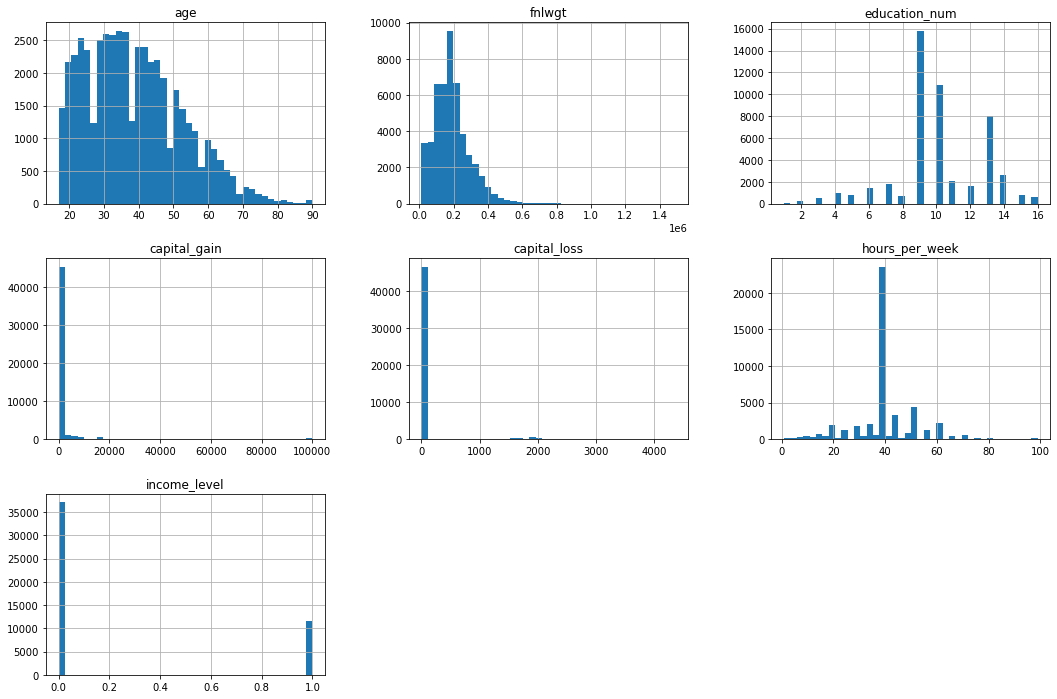

In [11]:
census_df.hist(bins=40,figsize=(18,12))

plt.show()

Niewiele osób posiadało jakikolwiek zysk/stratę kapitałową, stwórzmy ponownie hisotogramy z pominięciem wartości zerowej.

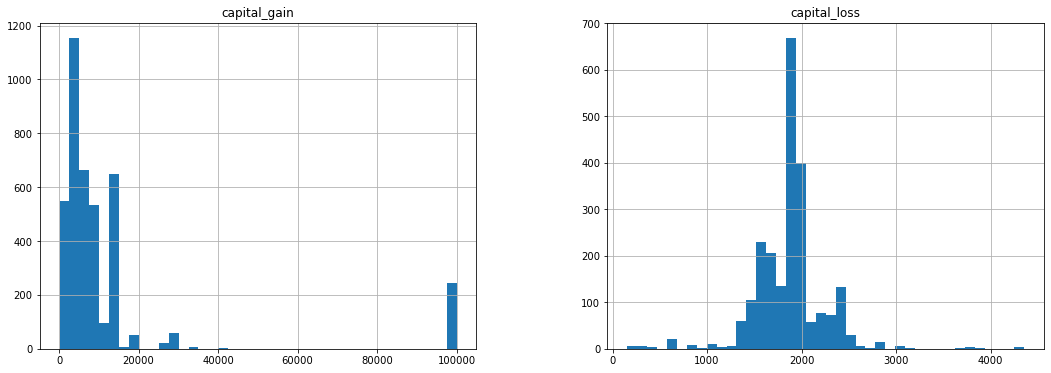

In [12]:
census_df[["capital_gain","capital_loss"]].replace(0, np.nan).hist(bins=40,figsize=(18,6))
plt.show()

In [13]:
len(census_df[census_df["capital_gain"]==99999])

244

Ilość obserwacji o wartości dokladnie 99999 jest podejrzana. Prawdopodobnie są to zamienione wszystkie obserwacje przekraczające tę wartość.

Teraz heatmapa korelacji.

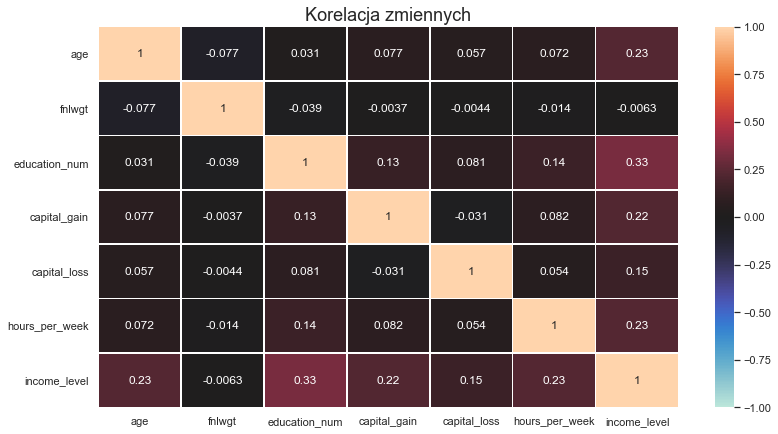

In [37]:
fig, ax = plt.subplots(figsize=(13,7)) 
sns.heatmap(census_df.corr(), linewidths=.5, center = 0, annot=True, vmin=-1)
plt.title("Korelacja zmiennych", size=18)
plt.show()

Z tego wynika, że zmienne nie są wysoce skolerowane.

Teraz istotne może być zbadanie wpływu wartości poszczególnych cech 

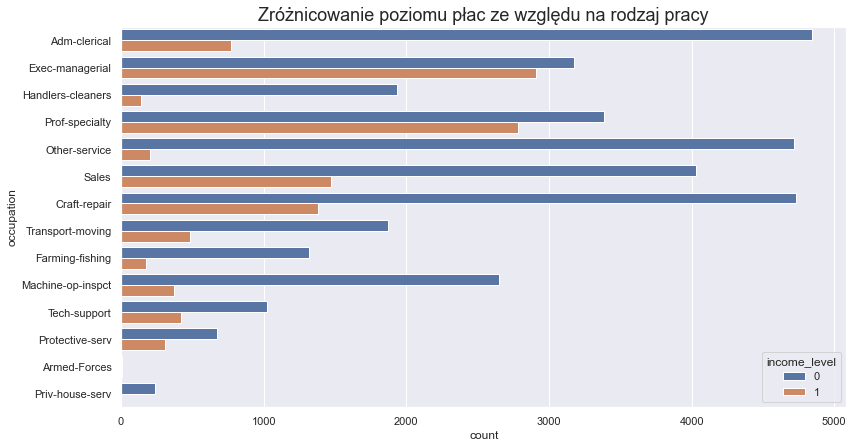

In [28]:
fig, ax = plt.subplots(figsize=(13,7))
sns.set_theme(style="darkgrid")
sns.countplot(y='occupation', hue='income_level', data=census_df)
plt.title("Zróżnicowanie poziomu płac ze względu na rodzaj pracy", size=18)
plt.show()

Wykres ten dostarcza wielu informacji na temat rozkładu prac w obrębie danej kategorii. Można zauważyć równomierny podział wśród np. Exec-managerial oraz Prof-specialty oraz dużą dysproporcję w takich profesjach jak np. Handlers-cleaners lub Other-service.

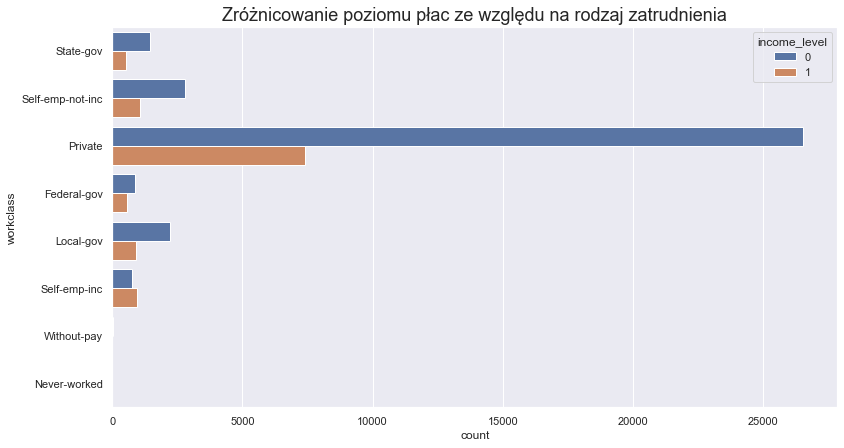

In [29]:
fig, ax = plt.subplots(figsize=(13,7))
sns.countplot(y='workclass', hue='income_level', data=census_df)
plt.title("Zróżnicowanie poziomu płac ze względu na rodzaj zatrudnienia", size=18)
plt.show()

Wnioski można wysnuwać analogicznie jak powyżej nt. dysproporcji klas jednocześnie zauważając znaczną przewagę zatrudnienia typu Private.

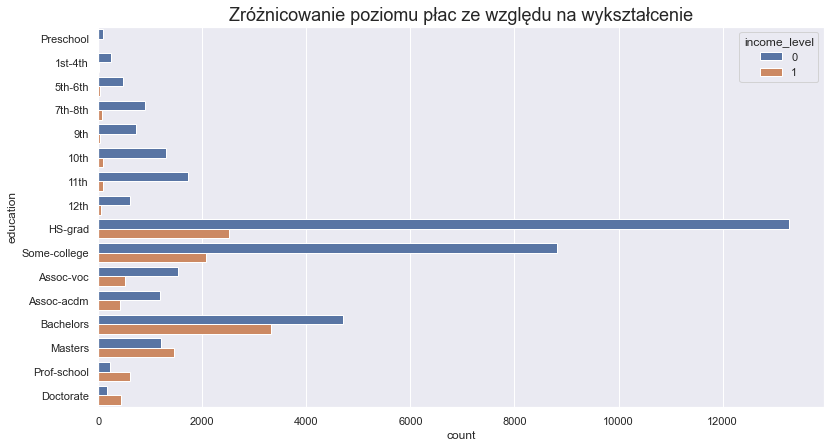

In [30]:
fig, ax = plt.subplots(figsize=(13,7))
education_in_order = census_df[['education_num', 'education']].drop_duplicates().sort_values(by=['education_num'])
sns.countplot(y='education', hue='income_level', data=census_df.sort_values(by=['education_num']))
plt.title("Zróżnicowanie poziomu płac ze względu na wykształcenie", size=18)
plt.show()

Można zauważyć stopniowy wzrost proporcji osób zarabiających więcej wraz ze wzrostem wykształcenia. Widać też, że najwięcej osób posiada wykształcenie HS-grad. Całość przypomina rozkład o pewnej skośności.

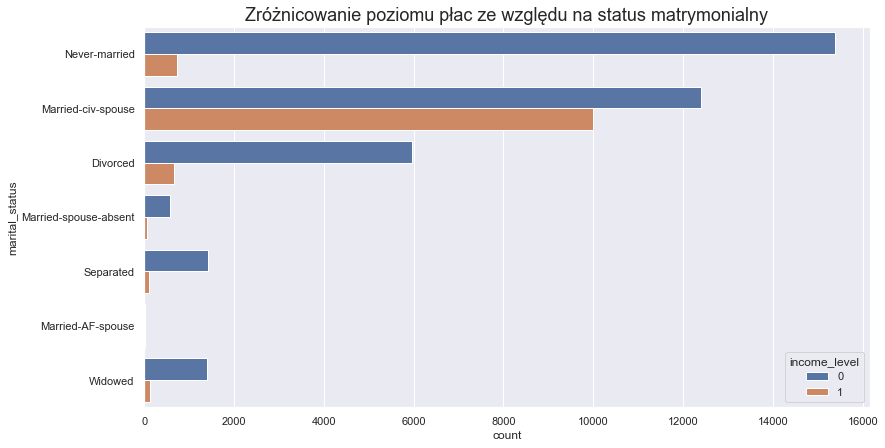

In [32]:
fig, ax = plt.subplots(figsize=(13,7))
sns.countplot(y='marital_status', hue='income_level', data=census_df)
plt.title("Zróżnicowanie poziomu płac ze względu na status matrymonialny", size=18)
plt.show()

Widać, że ludzie, którzy są w małżeństwie częściej zarabiają powyżej 50K.

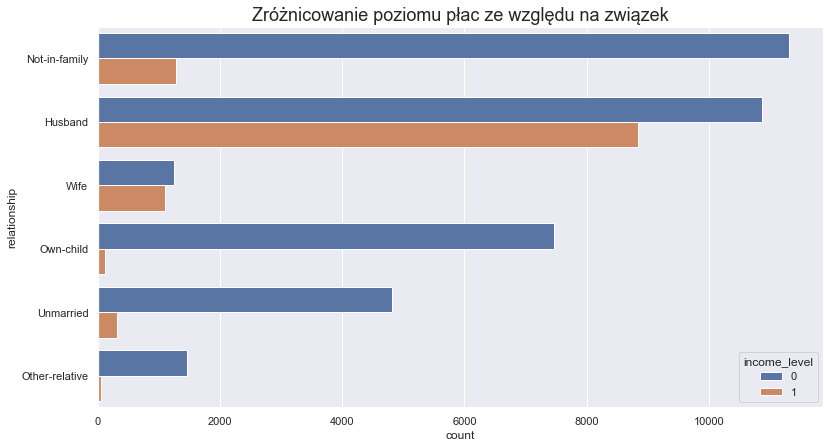

In [34]:
fig, ax = plt.subplots(figsize=(13,7))
sns.countplot(y='relationship', hue='income_level', data=census_df)
plt.title("Zróżnicowanie poziomu płac ze względu na związek", size=18)
plt.show()

Wnioski są takie same jak z poprzedniego wykresu.

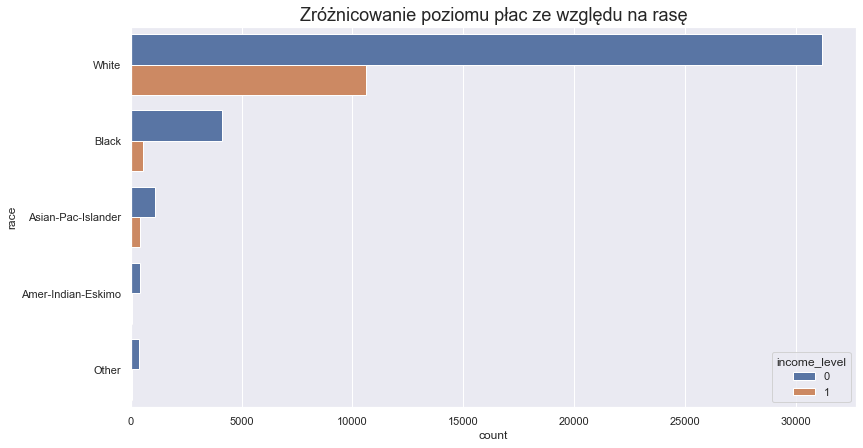

In [35]:
fig, ax = plt.subplots(figsize=(13,7))
sns.countplot(y='race', hue='income_level', data=census_df)
plt.title("Zróżnicowanie poziomu płac ze względu na rasę", size=18)
plt.show()

Widać dysproporcję płac ze względu na rasę.

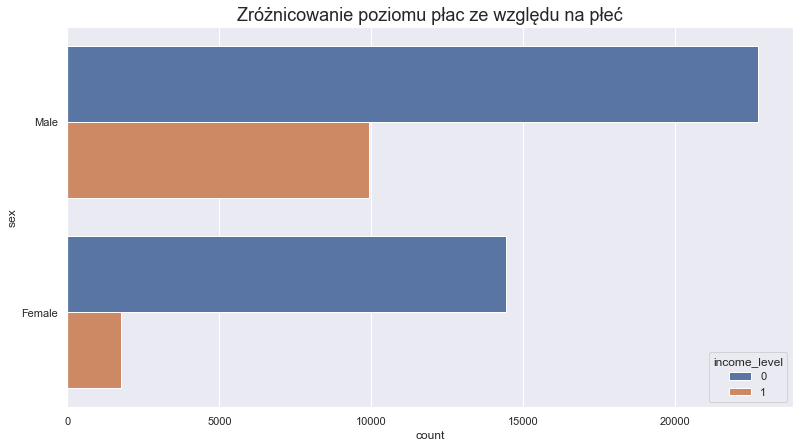

In [36]:
fig, ax = plt.subplots(figsize=(13,7))
sns.countplot(y='sex', hue='income_level', data=census_df)
plt.title("Zróżnicowanie poziomu płac ze względu na płeć", size=18)
plt.show()

W tym przypadku też widać dysproporcję płac.

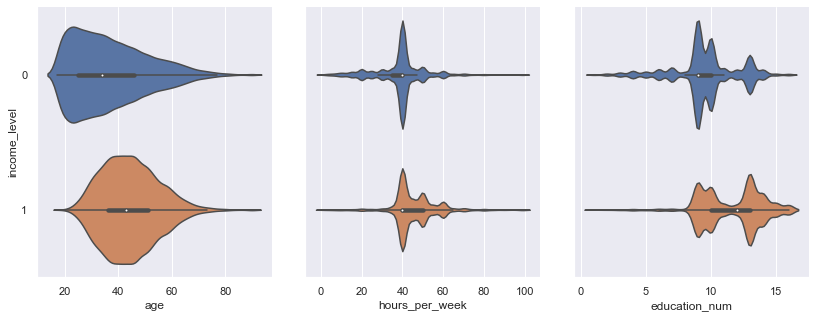

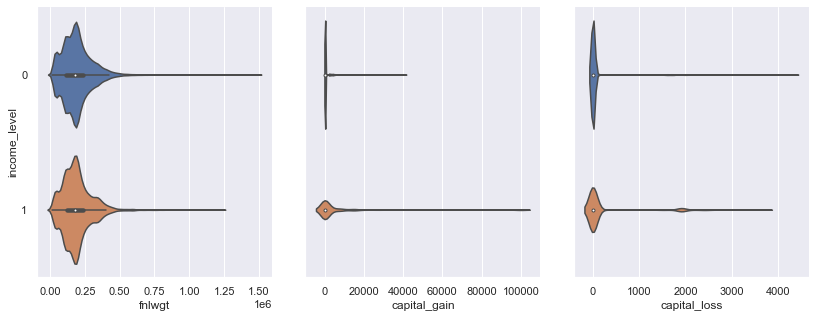

In [42]:
g = sns.PairGrid(data=census_df, x_vars=["age", "hours_per_week", "education_num"],
                 y_vars="income_level", height=3, aspect=1.1)
g.map(sns.violinplot, orient="h")
g.fig.set_size_inches(12,5)
h = sns.PairGrid(data=census_df, x_vars=["fnlwgt", "capital_gain", "capital_loss"],
                 y_vars="income_level", height=3, aspect=1.1)
h.map(sns.violinplot, orient="h")
h.fig.set_size_inches(12,5)
plt.show()

Z wykresów skrzypcowych można zauważyć rozkłady płac ze względu na dane ciągłe. Widać, że zarobki wzrastają wraz z wiekiem. Ponadto, można także zauważyć, że liczba przepracowywanych godzin w tygodniu wpływa na płacę. Wyres z education_num przeanalizowaliśmy tak naprawdę już przy okazji kolumny education - wraz z lepszym wykształceniem także można spodziewać się wyższych zarobków. Przy kolumnie fnlwgt rozkłady są bardzo podobne. Można też zauważyć, że ludzie zarabiający powyżej 50K inwestują więcej pieniędzy w akcje na giełdzie.

## Wnioski

Nasz zbiór danych zawiera wiersze w większości pełne i poprawnie wypełnione, jedynie 3620 wierszy zawiera wartości NaN, ale przeważnie w pojedynczych kolumnach. Można takie wiersze usunąć bez dużej straty dla zbioru (bo stanowią one tylko 7.4% wszystkich wierszych) lub wartości NaN zastąpić wartościami, które nie psują zbioru.
Jakiekolwiek widoczne korelacje można zauważyć tylko w parach z kolumną income_level, którym dokładnie się przyjrzeliśmy tworząc różne wykresy.